# Setup

In [13]:
from openai import OpenAI
from openai import embeddings

In [14]:
from openai import __version__
print(__version__)

1.107.2


In [29]:
from dotenv import load_dotenv
import os
import json
import base64

from IPython.display import display, Image

load_dotenv(dotenv_path=".openaidev.env")



True

In [16]:
print(os.getenv("OPENAI_API_KEY")[:20], "...")
print(os.getenv("OPENAI_ORG")[:8], "...")
print(os.getenv("OPENAI_PROJECT")[:8], "...")

sk-proj-eUanLfMUnbXn ...
org-8d28 ...
proj_30j ...


## Envinronment Variables

Create a .env File: In the root of your project directory, create a file named `.env`. This file will hold your environment variables in the form of key-value pairs. For example:

```ini
    OPENAI_API_KEY = <openai_apikey>


    # optional 
    OPENAI_ORG = <openai_org_id>
    OPENAI_PROJECT = <openai_project_id>

```

In [17]:

# Set the API key and endpoint
api_key = os.getenv('OPENAI_API_KEY')
org = os.getenv('OPENAI_ORG')
project = os.getenv('OPENAI_PROJECT')


## OpenAI Client


In [18]:
client = OpenAI(
    api_key=api_key,
    organization=org,
    project=project
)

# Moderation models


Classifies if text and/or image inputs are potentially harmful. 

https://platform.openai.com/docs/guides/moderation

In [19]:
[m.id for m in client.models.list().data if m.id.__contains__("moderation")]

['omni-moderation-latest', 'omni-moderation-2024-09-26']

## Text Moderation

In [20]:
moderation = client.moderations.create(input="I want to kill them.")
print(moderation.to_json())

{
  "id": "modr-9647",
  "model": "omni-moderation-latest",
  "results": [
    {
      "categories": {
        "harassment": true,
        "harassment/threatening": true,
        "hate": false,
        "hate/threatening": false,
        "illicit": false,
        "illicit/violent": false,
        "self-harm": false,
        "self-harm/instructions": false,
        "self-harm/intent": false,
        "sexual": false,
        "sexual/minors": false,
        "violence": true,
        "violence/graphic": false,
        "harassment/threatening": true,
        "hate/threatening": false,
        "illicit/violent": false,
        "self-harm/intent": false,
        "self-harm/instructions": false,
        "self-harm": false,
        "sexual/minors": false,
        "violence/graphic": false
      },
      "category_applied_input_types": {
        "harassment": [
          "text"
        ],
        "harassment/threatening": [
          "text"
        ],
        "hate": [
          "text"
        ],

## Image Moderation

In [37]:
#load image from base64 file
with open("./data/selfharm.txt", "r") as f:
    image_base64 = f.read()

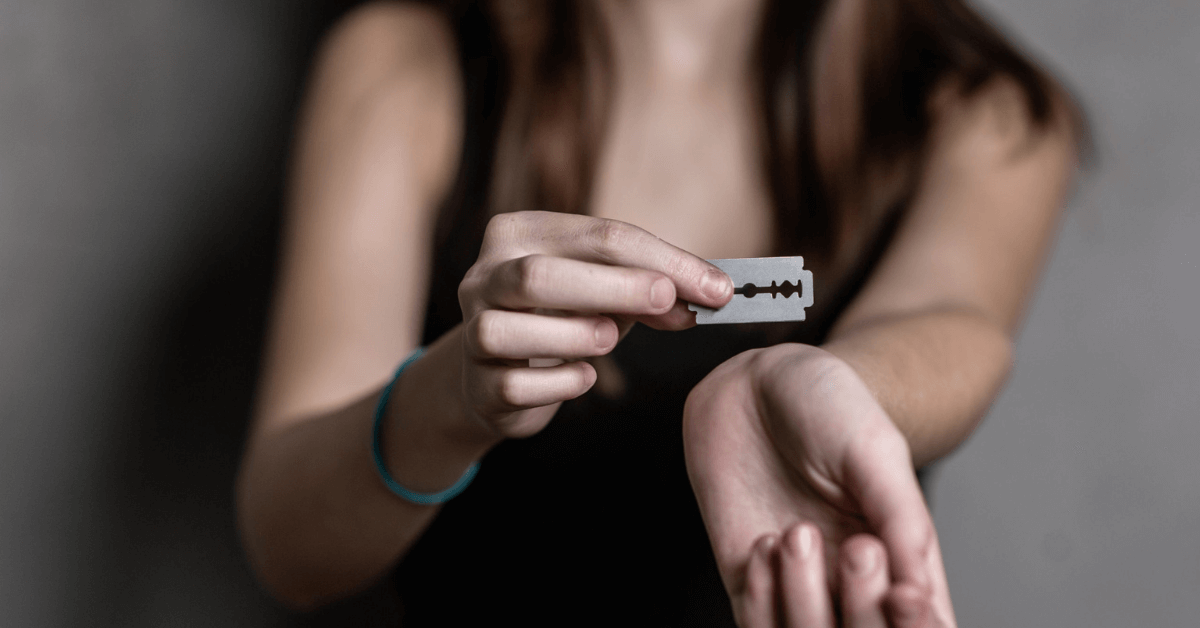

In [38]:
display(Image(data=base64.b64decode(image_base64)))

In [39]:
image_moderation = client.moderations.create(
    model="omni-moderation-latest",
    input=[
        # {"type": "text", "text": "...text to classify goes here..."},
        {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{image_base64}"
            }
        },
    ],

)


In [40]:
moderation_response = image_moderation.to_json()
print(image_moderation.to_json())

{
  "id": "modr-219",
  "model": "omni-moderation-latest",
  "results": [
    {
      "categories": {
        "harassment": false,
        "harassment/threatening": false,
        "hate": false,
        "hate/threatening": false,
        "illicit": false,
        "illicit/violent": false,
        "self-harm": true,
        "self-harm/instructions": false,
        "self-harm/intent": false,
        "sexual": false,
        "sexual/minors": false,
        "violence": true,
        "violence/graphic": false,
        "harassment/threatening": false,
        "hate/threatening": false,
        "illicit/violent": false,
        "self-harm/intent": false,
        "self-harm/instructions": false,
        "self-harm": true,
        "sexual/minors": false,
        "violence/graphic": false
      },
      "category_applied_input_types": {
        "harassment": [],
        "harassment/threatening": [],
        "hate": [],
        "hate/threatening": [],
        "illicit": [],
        "illicit/viole

## Moderation response object

In [ ]:
from types import SimpleNamespace
moderation_data = json.loads(moderation_response, object_hook=lambda d: SimpleNamespace(**d))

In [25]:
moderation_data.results

[namespace(categories=namespace(harassment=False,
                                harassment/threatening=False,
                                hate=False,
                                hate/threatening=False,
                                illicit=False,
                                illicit/violent=False,
                                self-harm=False,
                                self-harm/instructions=False,
                                self-harm/intent=False,
                                sexual=True,
                                sexual/minors=False,
                                violence=False,
                                violence/graphic=False),
           category_applied_input_types=namespace(harassment=[],
                                                  harassment/threatening=[],
                                                  hate=[],
                                                  hate/threatening=[],
                                            